In [1]:
import pandas as pd
import starbars

# 'project_id', 'ensemble_id', 'cell_line', 'region_id', 'gene_id', 'enh_id', 'dist_avg_dist', 'has_link'
distances_with_links = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)

In [2]:
distances_with_links

,project_id,ensemble_id,cell_line,region_id,gene_id,enh_id,avg_dist,has_link
0,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:49823143-49824413,7.876060,False
1,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50012133-50013263,9.131163,False
2,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50492953-50494843,9.038205,False
3,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:50795173-50796203,7.966821,False
4,8k_models_project_GM12878,models3D_GM12878_Nean_models3D_GM12878_Nean_re...,GM12878,chr20:49767977-51771783,ENSG00000000419,chr20:51549141-51550061,8.569405,False
...,...,...,...,...,...,...,...,...
2352716,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30645703-30647253,13.861824,False
2352717,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30667703-30671613,17.531174,False
2352718,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30877163-30878613,25.045715,False
2352719,8k_models_project_HFFC6,models3D_HFFC6_Nean_models3D_HFFC6_Nean_result...,HFFC6,chr1:29302990-31311589,ENSG00000289710,chr1:30933343-30935683,23.140881,False


In [3]:
gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [4]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Nean"]]

# gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]
# h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['enh_tSS_distance'] < 1_000_000]

In [5]:
gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80


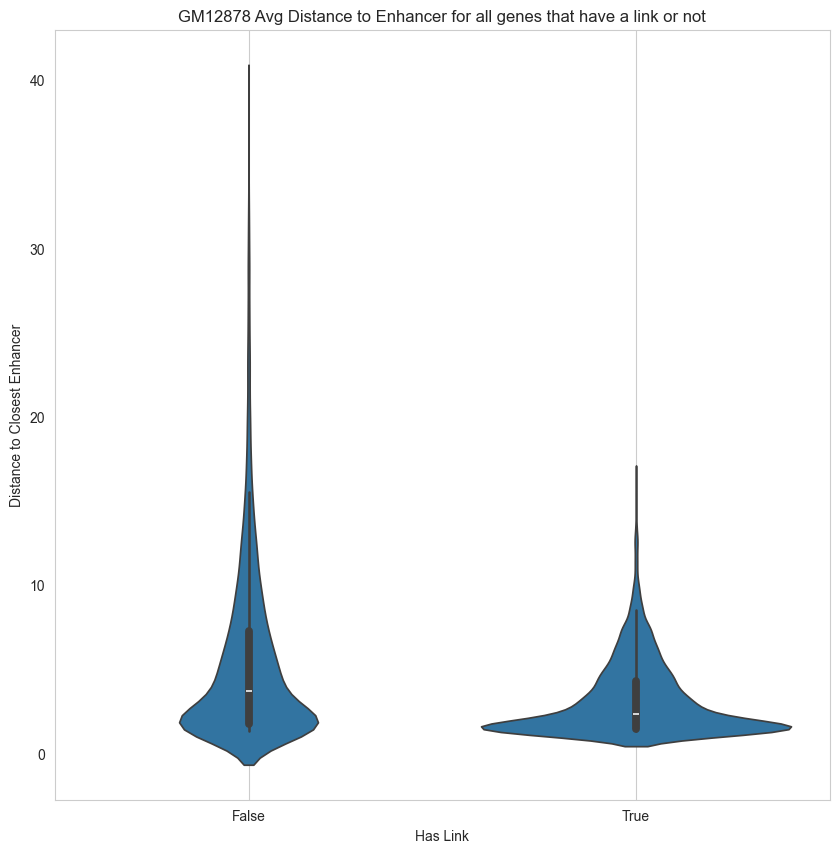

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
ax = sns.violinplot(data=gm12878_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = gm12878_gene_to_closest_avg_enhancer_all[gm12878_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

# show the p value
# starbars.draw_annotation(
#     annotations=[('has_link', 'min_dist', p)],
#     ax=ax
# )

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("GM12878 Avg Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4199314.5, p-value: 1.615056162416597e-80


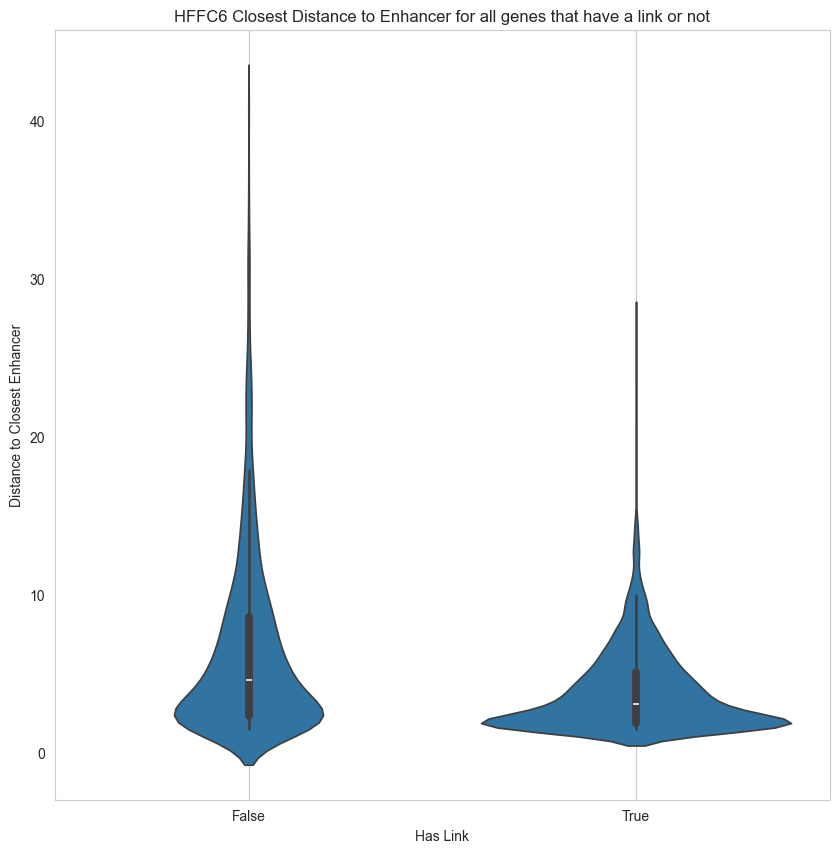

In [7]:
 # Box plot of the distance to the closest enhancer for all genes that have a link or not in HFFC6
plt.figure(figsize=(10, 10))
sns.violinplot(data=hffc6_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = hffc6_gene_to_closest_avg_enhancer_all[hffc6_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("HFFC6 Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65


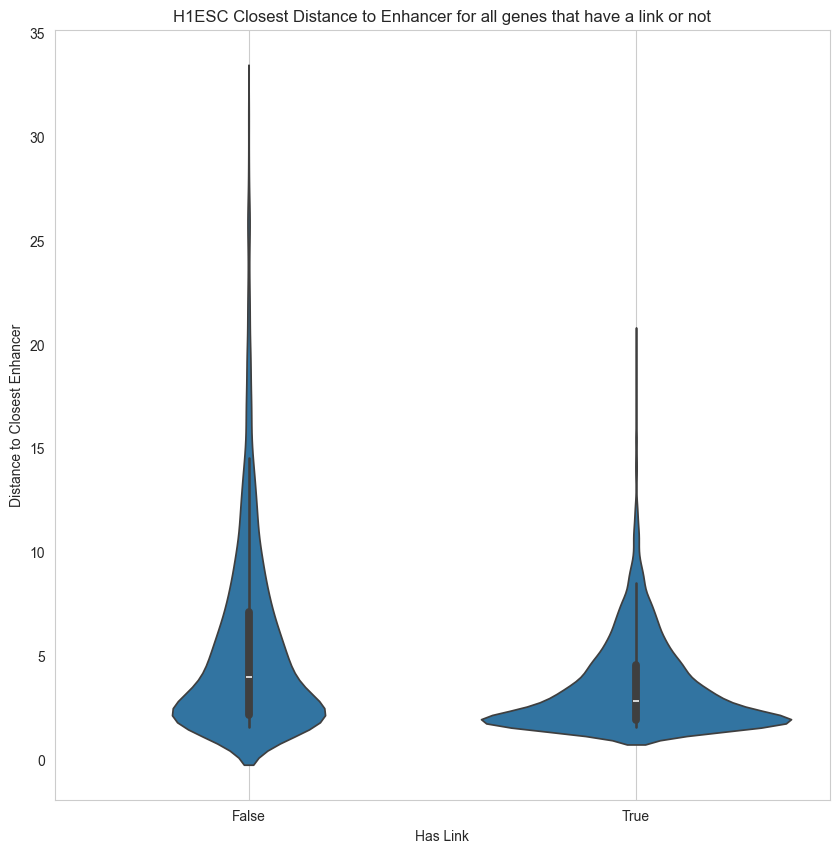

In [8]:
# Box plot of the distance to the closest enhancer for all genes that have a link or not in H1ESC
plt.figure(figsize=(10, 10))
sns.violinplot(data=h1esc_gene_to_closest_avg_enhancer_all, x="has_link", y="min_dist")

# show mannwhitney U test
from scipy.stats import mannwhitneyu
has_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == True]["min_dist"]
no_link = h1esc_gene_to_closest_avg_enhancer_all[h1esc_gene_to_closest_avg_enhancer_all["has_link"] == False]["min_dist"]
stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
print(f"U-statistic: {stat}, p-value: {p}")

plt.xlabel("Has Link")
plt.ylabel("Distance to Closest Enhancer")
plt.title("H1ESC Closest Distance to Enhancer for all genes that have a link or not")
plt.grid()
plt.show()

U-statistic: 4557735.0, p-value: 1.4852613998710292e-80
2.0 0.03


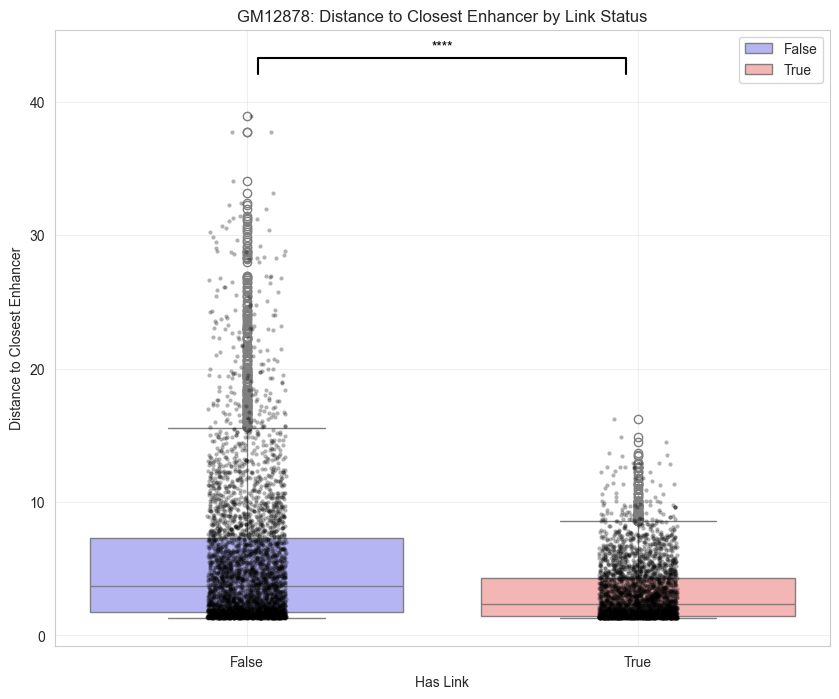

U-statistic: 4199314.5, p-value: 1.615056162416597e-80
2.0 0.03


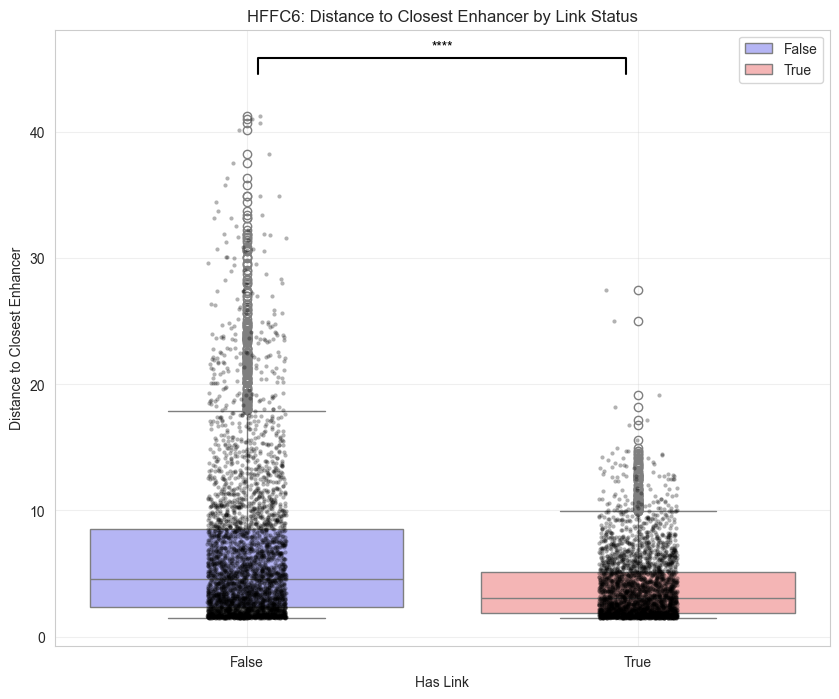

U-statistic: 4465277.0, p-value: 2.1248881833616996e-65
2.0 0.03


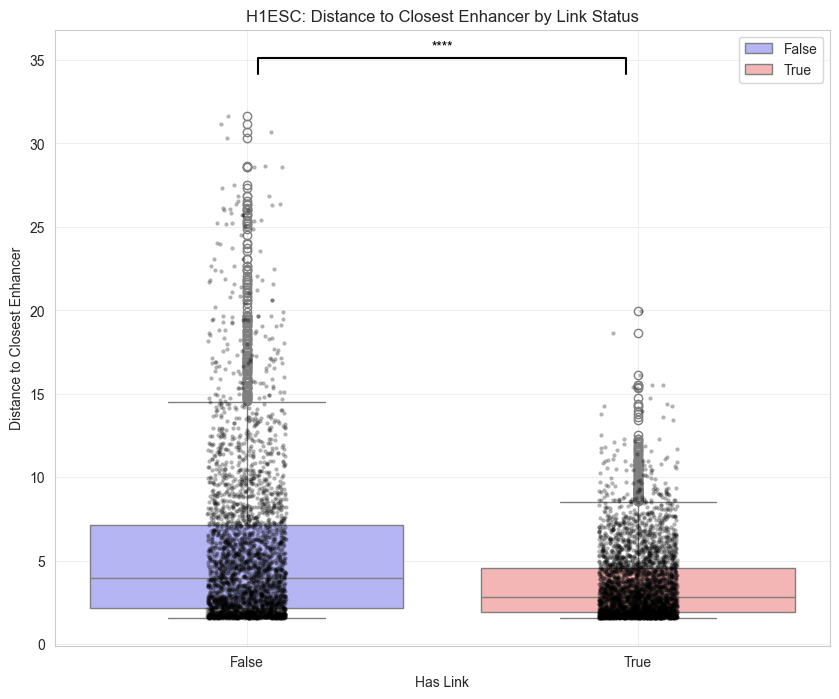

In [9]:

def plot_with_starbars(df, column, title, palette=None):
    """
    Creates a boxplot with significance stars using starbars package.

    Args:
        df: DataFrame with 'has_link' column
        column: Column to plot (e.g. 'min_dist')
        title: Plot title
        palette: Optional color palette for the plot
    """
    plt.figure(figsize=(10, 8))

    # Create boxplot
    ax = sns.boxplot(
        data=df,
        x='has_link',
        y=column,
        palette=palette or ['#AAAAFF', '#FFAAAA'],
        hue='has_link'
    )

    # Add individual data points
    sns.stripplot(
        data=df,
        x='has_link',
        y=column,
        color='black',
        size=3,
        alpha=0.3,
        jitter=True
    )

    # Perform Mann-Whitney U test
    has_link = df[df["has_link"] == True][column]
    no_link = df[df["has_link"] == False][column]
    stat, p = mannwhitneyu(has_link, no_link, alternative='two-sided')
    print(f"U-statistic: {stat}, p-value: {p}")

    # Add significance stars using starbars
    annotations = [(False, True, p)]  # Compare False vs True
    starbars.draw_annotation(
        annotations=annotations,
        ax=ax
    )

    plt.title(title)
    plt.xlabel("Has Link")
    plt.ylabel("Distance to Closest Enhancer")
    plt.grid(alpha=0.3)
    return plt

# Example usage for each cell line
plot_with_starbars(
    gm12878_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "GM12878: Distance to Closest Enhancer by Link Status"
).show()

plot_with_starbars(
    hffc6_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "HFFC6: Distance to Closest Enhancer by Link Status"
).show()

plot_with_starbars(
    h1esc_gene_to_closest_avg_enhancer_all,
    "min_dist",
    "H1ESC: Distance to Closest Enhancer by Link Status"
).show()

In [10]:
gm12878_neanderthal_all_pairs_with_has_link = gm12878_neanderthal_df_ref.copy()
gm12878_neanderthal_all_pairs_with_has_link['has_link'] = (
    gm12878_neanderthal_all_pairs_with_has_link['gene_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & gm12878_neanderthal_all_pairs_with_has_link['enh_id'].isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

hffc6_neanderthal_all_pairs_with_has_link = hffc6_neanderthal_df_ref.copy()
hffc6_neanderthal_all_pairs_with_has_link['has_link'] = (
    hffc6_neanderthal_all_pairs_with_has_link['gene_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & hffc6_neanderthal_all_pairs_with_has_link['enh_id'].isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

h1esc_neanderthal_all_pairs_with_has_link = h1esc_neanderthal_df_ref.copy()
h1esc_neanderthal_all_pairs_with_has_link['has_link'] = (
    h1esc_neanderthal_all_pairs_with_has_link['gene_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['gene_id'].unique())
    & h1esc_neanderthal_all_pairs_with_has_link['enh_id'].isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]['enh_id'].unique())
)

In [11]:
all_pairs_joined_hffc6_h1esc = (
    gm12878_neanderthal_all_pairs_with_has_link
    .merge(
        hffc6_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_gm12878", "_hffc6"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, gm12878_avg_dist, hffc6_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (gm12878, hffc6)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_gm12878_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_hffc6_yes_link_gm12878_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_gm12878"] == False)
        ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_gm12878", "avg_dist_hffc6"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

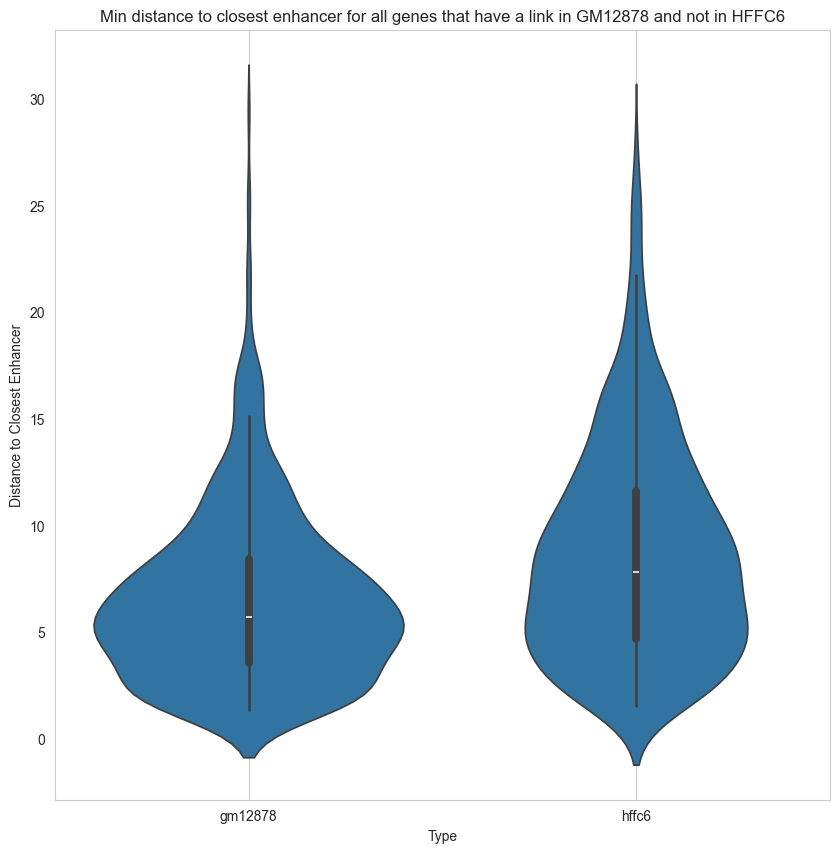

In [12]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(10, 10))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_gm12878_yes_link_hffc6_no_link,
)

plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in GM12878 and not in HFFC6")
plt.grid()
plt.show()

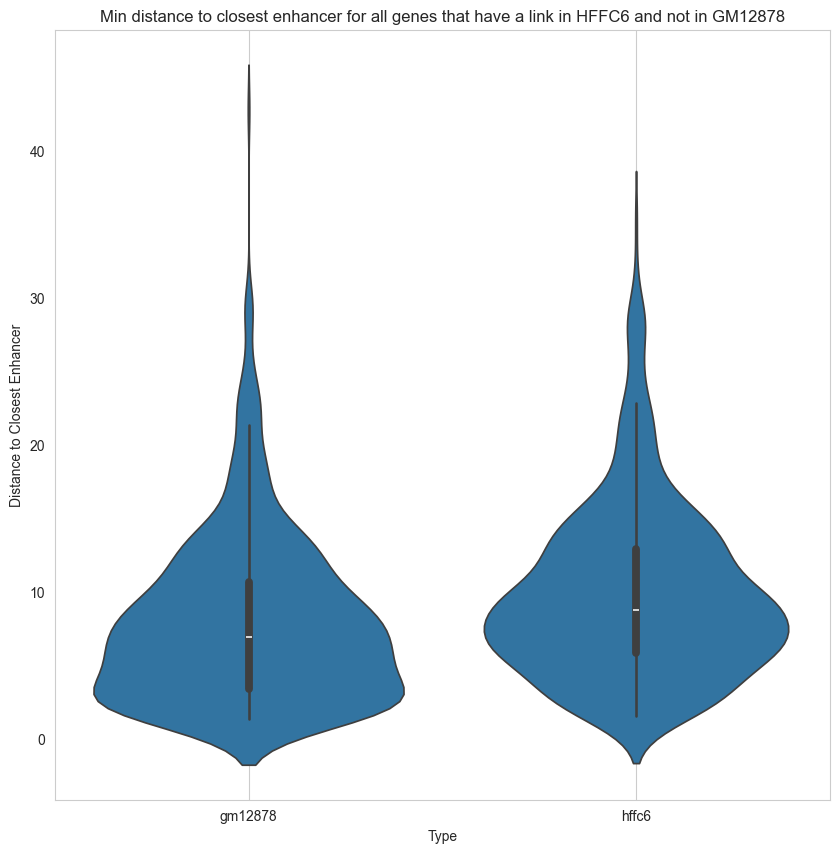

In [13]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in GM12878
plt.figure(figsize=(10, 10))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_gm12878_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in GM12878")
plt.grid()
plt.show()

In [14]:
all_pairs_joined_hffc6_h1esc = (
    hffc6_neanderthal_all_pairs_with_has_link
    .merge(
        h1esc_neanderthal_all_pairs_with_has_link,
        on=["region_id", "gene_id", "enh_id"],
        suffixes=("_hffc6", "_h1esc"),
        how="inner"
    )
)

# region_id, gene_id, enh_id, hffc6_avg_dist, h1esc_avg_dist -> region_id, gene_id, enh_id, avg_dist, type (hffc6, h1esc)
# group by type and gene_id, and calculate the average distance
all_pairs_by_type_hffc6_yes_link_h1esc_no_link = (
    all_pairs_joined_hffc6_h1esc
    [
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

all_pairs_by_type_h1esc_yes_link_hffc6_no_link = (
    all_pairs_joined_hffc6_h1esc[
        (all_pairs_joined_hffc6_h1esc["has_link_h1esc"] == True) &
        (all_pairs_joined_hffc6_h1esc["has_link_hffc6"] == False)
    ]
    .melt(
        id_vars=["region_id", "gene_id", "enh_id"],
        value_vars=["avg_dist_hffc6", "avg_dist_h1esc"],
        var_name="type",
        value_name="avg_dist"
    )
    .assign(type=lambda x: x["type"].str.replace("avg_dist_", ""))
    .groupby(["type", "gene_id"])
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .reset_index()
)

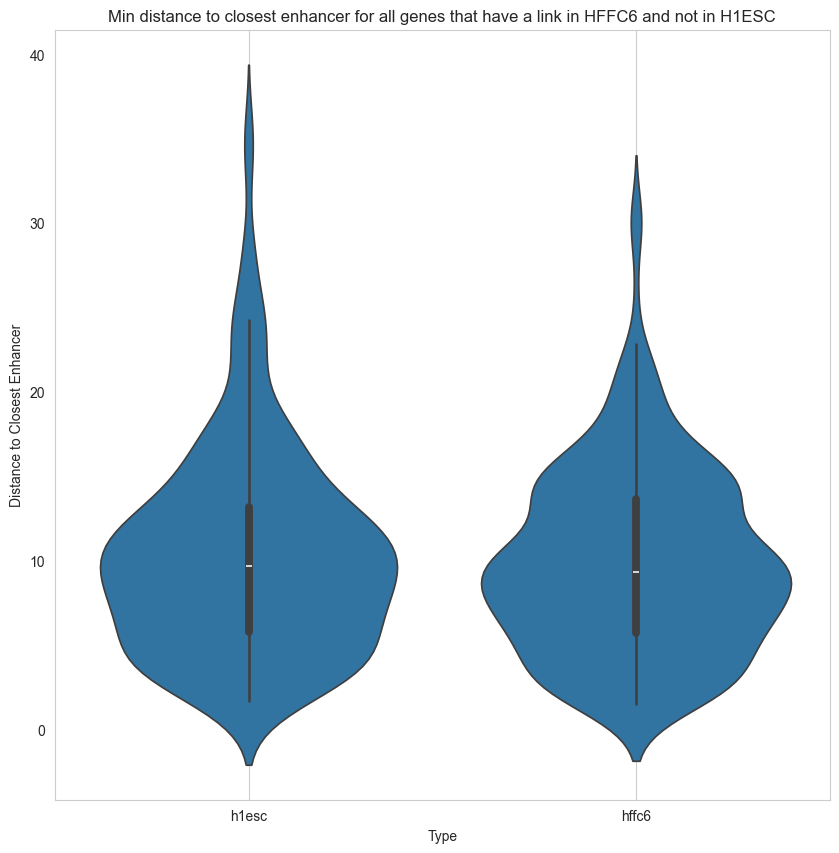

In [15]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(10, 10))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_hffc6_yes_link_h1esc_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in HFFC6 and not in H1ESC")
plt.grid()
plt.show()

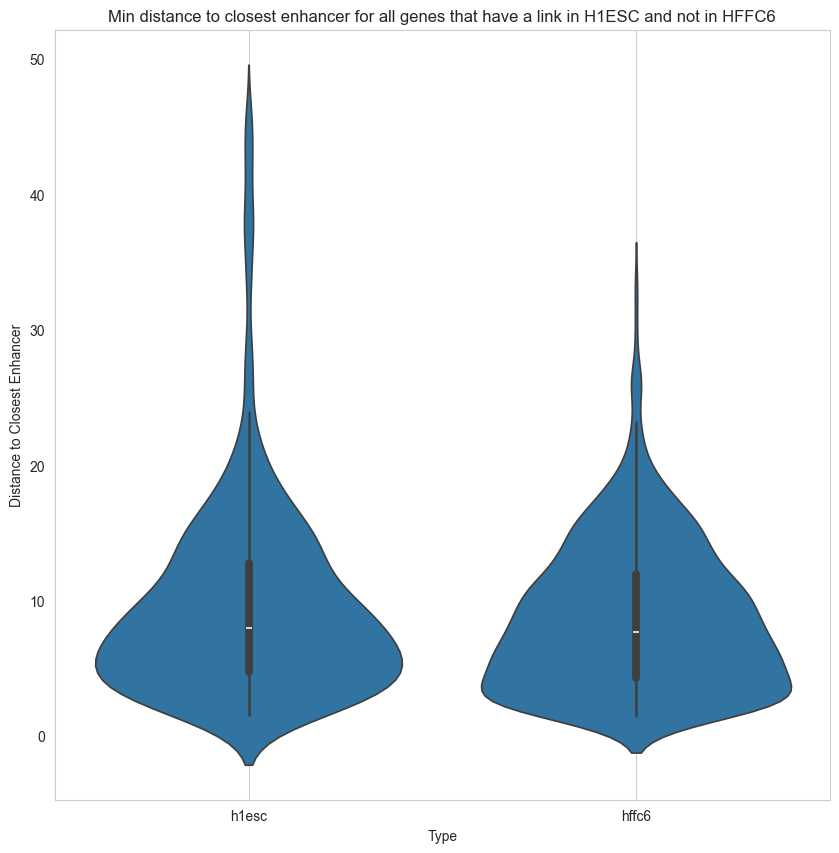

In [16]:
# box plot of the distance to the closest enhancer for all genes that have a link or not in hffc6
plt.figure(figsize=(10, 10))
sns.violinplot(
    x="type",
    y="min_dist",
    data=all_pairs_by_type_h1esc_yes_link_hffc6_no_link,
)
plt.xlabel("Type")
plt.ylabel("Distance to Closest Enhancer")

plt.title("Min distance to closest enhancer for all genes that have a link in H1ESC and not in HFFC6")
plt.grid()
plt.show()

In [22]:
# 1. Add quartile-based category columns for each cell line
for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.33)
    q3 = df['min_dist'].quantile(0.66)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

In [26]:
hffc6_gene_to_closest_avg_enhancer_all

,avg_dist,min_dist,max_dist,has_link,quartile_cat
gene_id,,,,,
ENSG00000106123,1.926510,1.926510,1.926510,False,small
ENSG00000136881,2.189550,2.189550,2.189550,False,small
ENSG00000136872,2.346342,2.346342,2.346342,False,small
ENSG00000257743,3.267527,3.267527,3.267527,False,mid
ENSG00000184698,3.420347,1.609941,7.708592,False,small
...,...,...,...,...,...
ENSG00000197532,40.829543,40.137157,42.516533,False,large
ENSG00000186440,41.445610,40.732639,43.253117,False,large
ENSG00000279111,41.740176,41.016712,43.618973,False,large


In [33]:
# 2. Compare quartile jumps for genes with link in one cell line but not the other
# Example: GM12878 vs HFFC6
merged_gm12878_hffc6 = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_hffc6')
)
# Genes with link in GM12878 but not in HFFC6
jump_gm12878_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_gm12878']) & (~merged_gm12878_hffc6['has_link_hffc6'])]
# Genes with link in HFFC6 but not in GM12878
jump_hffc6_link = merged_gm12878_hffc6[(merged_gm12878_hffc6['has_link_hffc6']) & (~merged_gm12878_hffc6['has_link_gm12878'])]

# Count quartile jumps
from collections import Counter
jumps_hffc6_no_link_to_gm12878_link = Counter(zip(jump_gm12878_link['quartile_cat_gm12878'], jump_gm12878_link['quartile_cat_hffc6']))
jumps_gm12878_no_link_to_hffc6_link = Counter(zip(jump_hffc6_link['quartile_cat_hffc6'], jump_hffc6_link['quartile_cat_gm12878']))

# print('Quartile jumps (GM12878 link, HFFC6 no link):')
# for k, v in jumps_gm12878.items():
#     print(f'{k[0]} → {k[1]}: {v}')
# print('\nQuartile jumps (HFFC6 link, GM12878 no link):')
# for k, v in jumps_hffc6.items():
#     print(f'{k[0]} → {k[1]}: {v}')

# You can repeat the above for other cell line pairs as needed.

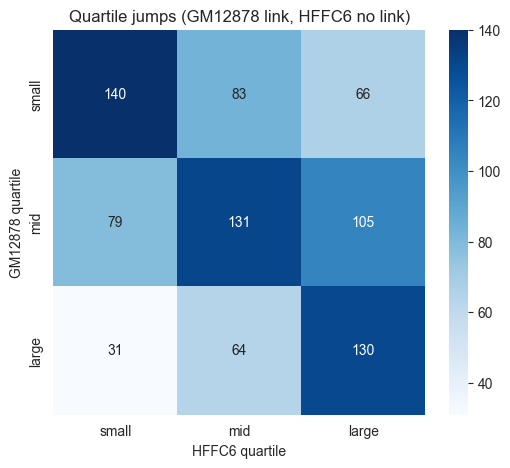

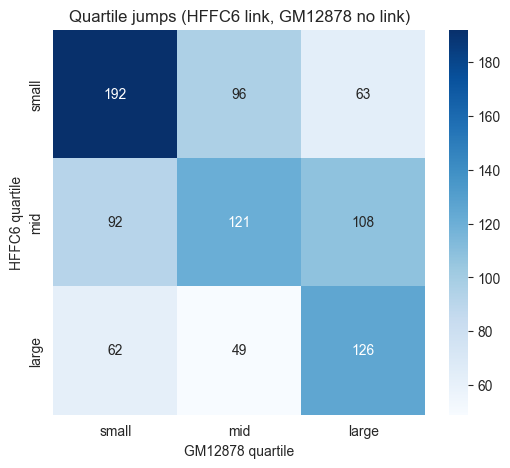

In [29]:
# Plot quartile jumps as a heatmap (not a graph)
def plot_quartile_jumps_heatmap(jumps, title, y_label, x_label):
    import numpy as np
    import seaborn as sns
    quartiles = ['small', 'mid', 'large']
    matrix = np.zeros((3, 3), dtype=int)
    for i, src in enumerate(quartiles):
        for j, dst in enumerate(quartiles):
            matrix[i, j] = jumps.get((src, dst), 0)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=quartiles, yticklabels=quartiles)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

plot_quartile_jumps_heatmap(jumps_hffc6_no_link_to_gm12878_link, 'Quartile jumps (GM12878 link, HFFC6 no link)', 'GM12878 quartile', 'HFFC6 quartile')
plot_quartile_jumps_heatmap(jumps_gm12878_no_link_to_hffc6_link, 'Quartile jumps (HFFC6 link, GM12878 no link)', 'HFFC6 quartile', 'GM12878 quartile')

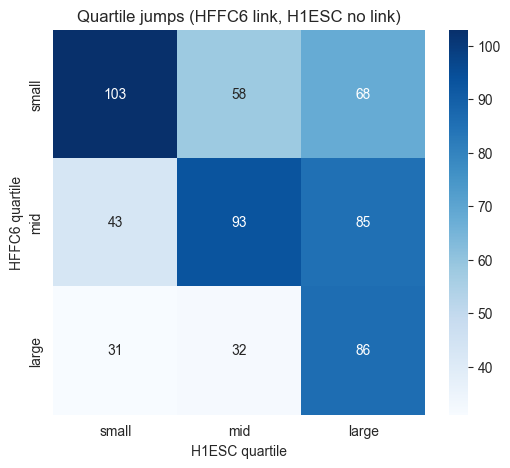

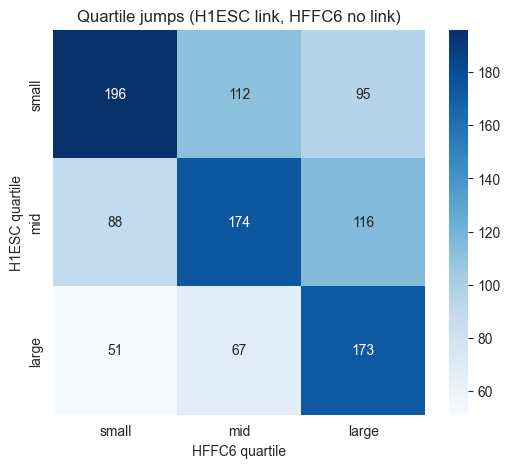

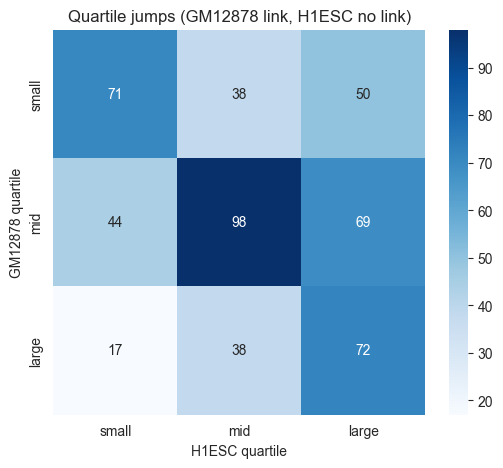

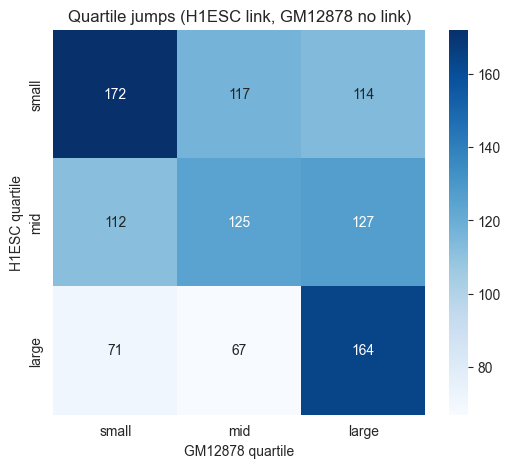

In [30]:
# HFFC6 <-> H1ESC
merged_hffc6_h1esc = hffc6_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_hffc6', '_h1esc')
)
jump_hffc6_link_h1esc = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_hffc6']) & (~merged_hffc6_h1esc['has_link_h1esc'])]
jump_h1esc_link_hffc6 = merged_hffc6_h1esc[(merged_hffc6_h1esc['has_link_h1esc']) & (~merged_hffc6_h1esc['has_link_hffc6'])]
from collections import Counter
jumps_hffc6_h1esc = Counter(zip(jump_hffc6_link_h1esc['quartile_cat_hffc6'], jump_hffc6_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_hffc6 = Counter(zip(jump_h1esc_link_hffc6['quartile_cat_h1esc'], jump_h1esc_link_hffc6['quartile_cat_hffc6']))

plot_quartile_jumps_heatmap(jumps_hffc6_h1esc, 'Quartile jumps (HFFC6 link, H1ESC no link)', 'HFFC6 quartile', 'H1ESC quartile')
plot_quartile_jumps_heatmap(jumps_h1esc_hffc6, 'Quartile jumps (H1ESC link, HFFC6 no link)', 'H1ESC quartile', 'HFFC6 quartile')

# GM12878 <-> H1ESC
merged_gm12878_h1esc = gm12878_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']].merge(
    h1esc_gene_to_closest_avg_enhancer_all[['quartile_cat', 'has_link']],
    left_index=True, right_index=True, suffixes=('_gm12878', '_h1esc')
)
jump_gm12878_link_h1esc = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_gm12878']) & (~merged_gm12878_h1esc['has_link_h1esc'])]
jump_h1esc_link_gm12878 = merged_gm12878_h1esc[(merged_gm12878_h1esc['has_link_h1esc']) & (~merged_gm12878_h1esc['has_link_gm12878'])]
jumps_gm12878_h1esc = Counter(zip(jump_gm12878_link_h1esc['quartile_cat_gm12878'], jump_gm12878_link_h1esc['quartile_cat_h1esc']))
jumps_h1esc_gm12878 = Counter(zip(jump_h1esc_link_gm12878['quartile_cat_h1esc'], jump_h1esc_link_gm12878['quartile_cat_gm12878']))

plot_quartile_jumps_heatmap(jumps_gm12878_h1esc, 'Quartile jumps (GM12878 link, H1ESC no link)', 'GM12878 quartile', 'H1ESC quartile')
plot_quartile_jumps_heatmap(jumps_h1esc_gm12878, 'Quartile jumps (H1ESC link, GM12878 no link)', 'H1ESC quartile', 'GM12878 quartile')

In [31]:
# Text version for all pairs
print('Quartile jumps (GM12878 link, HFFC6 no link):')
for k, v in jumps_hffc6_no_link_to_gm12878_link.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (HFFC6 link, GM12878 no link):')
for k, v in jumps_gm12878_no_link_to_hffc6_link.items():
    print(f'{k[0]} → {k[1]}: {v}')

print('\nQuartile jumps (HFFC6 link, H1ESC no link):')
for k, v in jumps_hffc6_h1esc.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (H1ESC link, HFFC6 no link):')
for k, v in jumps_h1esc_hffc6.items():
    print(f'{k[0]} → {k[1]}: {v}')

print('\nQuartile jumps (GM12878 link, H1ESC no link):')
for k, v in jumps_gm12878_h1esc.items():
    print(f'{k[0]} → {k[1]}: {v}')
print('\nQuartile jumps (H1ESC link, GM12878 no link):')
for k, v in jumps_h1esc_gm12878.items():
    print(f'{k[0]} → {k[1]}: {v}')

Quartile jumps (GM12878 link, HFFC6 no link):
small → small: 140
small → mid: 83
mid → small: 79
mid → large: 105
small → large: 66
mid → mid: 131
large → large: 130
large → mid: 64
large → small: 31

Quartile jumps (HFFC6 link, GM12878 no link):
large → small: 62
small → small: 192
mid → small: 92
mid → mid: 121
small → mid: 96
large → mid: 49
mid → large: 108
large → large: 126
small → large: 63

Quartile jumps (HFFC6 link, H1ESC no link):
small → large: 68
small → mid: 58
small → small: 103
mid → mid: 93
mid → large: 85
mid → small: 43
large → large: 86
large → mid: 32
large → small: 31

Quartile jumps (H1ESC link, HFFC6 no link):
small → small: 196
mid → small: 88
mid → mid: 174
large → large: 173
small → mid: 112
large → small: 51
large → mid: 67
small → large: 95
mid → large: 116

Quartile jumps (GM12878 link, H1ESC no link):
small → small: 71
mid → mid: 98
small → mid: 38
mid → large: 69
small → large: 50
mid → small: 44
large → mid: 38
large → small: 17
large → large: 72

Quart

In [104]:
from gprofiler import GProfiler

gp = GProfiler(
    user_agent='enhancer3d', #optional user agent
    return_dataframe=True, #return pandas dataframe or plain python structures
)

def cell_line_1_small_has_link_cell_line_2_large_no_link(
    cell_line_1_gene_to_closest_avg_enhancer,
    cell_line_2_gene_to_closest_avg_enhancer,
    cell_line_1_name,
    cell_line_2_name
):
    """
    Finds genes that are small in cell line 1 and large in cell line 2, with a link in cell line 1 but not in cell line 2.
    """
    result = (
        cell_line_1_gene_to_closest_avg_enhancer
        .merge(
            cell_line_2_gene_to_closest_avg_enhancer,
            on="gene_id",
            suffixes=("_" + cell_line_1_name, "_" + cell_line_2_name)
        )
        # .query(
        #     f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large' and has_link_{cell_line_1_name} == True and has_link_{cell_line_2_name} == False"
        # )
        .query(
            f"quartile_cat_{cell_line_1_name} == 'small' and quartile_cat_{cell_line_2_name} == 'large'"
        )
    )

    gene_names = (
        gp
        .convert(
            organism='hsapiens',
            query=result.index.unique().tolist()
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    result = result.merge(
        gene_names,
        left_index=True,
        right_index=True,
        how='inner'
    )

    return list(filter(lambda x: x != 'None', result['name'].tolist()))

In [96]:
print("GM12878 small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'hffc6'
    )
))

GM12878 small has link, HFFC6 large no link:
KRT10
SMIM6
OTOP2
USH1G
CRIP3
C4BPB
NCOA3
AKAP8
ZSCAN32
HLA-DRA
FLVCR1
LGMN
ATP2A3
DENND1C
TRPV3
VAV1
APOBEC3H
GIMAP8
LRIF1
ADAMTSL2
PAX5
CD22
NUP210
HDAC11
ITGAL
ADA2
None
PNRC1
RNGTT
CCDC197
ADGRD2
IMMT
TMOD1
ZNF207
C17orf75
FAM111B
PIKFYVE
IDH1
FFAR2
ACOT2
PDHB
NUDT5
CDC123
CCDC74A
LGALS14
OR52H1
CD70
SUV39H2
CD1C
PKN2
RNASE1
ZNF83
KRBA1
TTYH1
CX3CL1
CYP1A1
SMIM15
CPD
ADGRB1
CERS4
NKX6-3
XPA
OR13A1
PIK3CB
ALOX5
CCDC166


In [98]:
print("HFFC6 small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'gm12878'
    )
))

HFFC6 small has link, GM12878 large no link:
BAAT
TMEM167B
STIP1
ANKRD33
LGALS12
EPS8L3
TPGS2
KIAA1328
OLFM4
KRT74
PCDHA6
PCDHA5
PCDHA4
PCDHA3
MIEF1
PGLYRP1
PCDHA2
LSM2
NEU1
HSD17B8
NPTXR
KISS1
None
None
UQCR11
CARD9
None
MT1G
LPCAT2
ZBTB25
PTCD3
POLR1A
RHBG
C3orf80
GOT2
NPIPB12
None
NMNAT3
MAPK3
MT1H
AMH
PCDHA1
KRT13
FAIM
PRSS27
PNMA8A
ST3GAL5
SERPINH1
SLC38A8
BAHCC1
PCDHB3
AGBL2
FNBP4
FAM3D
PCDHB1
PCDHGB2
NAT8
SPOCK1
SPINK1
DVL1
RBP1
RBP2
NPIPB11
PCDHB2
COPB2
PCDHB7
PRODH2
TENT5B
C6
SCGB3A2
None
ARL8A
SRRM2
MYBPHL
TBC1D3
PPP2R5B
CCDC152
FRMPD1
COPB1
PIWIL3
ACOT11
CRYBB2
RAMACL
VSIG8
ZNF581
EDF1
CHGA
PRELP
KLHL35
UBE2J2
ZNF835
OR4E1
SMIM17
PDSS2
GPR148
SMCO3
ZNF71
EP400
ZNF470
ZFP28
OR4E2
ZNF749
ZNF471
TRMT10C
DUOX1
DUOXA1
ZNF667
GP6
None
LRRC57
HAUS2
DPYSL3
SNX8
EIF3B
ZNF580
ZNF583
C1QTNF9
COL5A1
OR10G2
SNW1
TXNDC8
ZNF549
ZNF530
MYO10
ZNF550
ZNF416
ZIK1
MRGPRG
PYCR1
ZNF134
BRF1
CCN1
SYT5
ZNF776
ZNHIT6
ZSCAN4
MAPKAPK5
ALMS1
CA12
CDAN1
ARRDC1
SUN2
DNAL4
RAP1GAP2
CYBA
SPCS2
XRRA1
ZMYM2


In [100]:
print("HFFC6 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        hffc6_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'hffc6',
        'h1esc'
    )
))

HFFC6 small has link, H1ESC large no link:
ALDOB
OR51M1
TRIM22
FAM83D
TGFB1
ST6GALNAC2
IFI16
TRIM47
TMEM91
None
RPS19
PSG3
LCE2D
SLC25A19
BATF2
RBM15
TRIM34
PRDX5
TRMT112
None
CD55
MRPS18B
OLFM4
TNIP1
SMIM43
YTHDF2
SUGT1
FAM76A
ZDHHC18
RGL2
PRRT1
PPT2
TAP1
None
PPT2-EGFL8
NEU1
MICB
POU2F2
EXD3
NOXA1
C14orf93
OTUD3
BCL2L2-PABPN1
CDC34
ATOH8
INPP5E
DNLZ
GPR108
CIC
GJC3
ZSCAN21
IK
AKAP1
MICAL3
HAP1
PTCD3
POLR1A
None
RHBG
GOT2
LONP1
CATSPERD
TRIP10
RLF
CCL13
ZNF697
ARSG
SCMH1
CCT6B
PCDHGA6
REST
LYZL6
TSTD3
USP45
PNISR
IER3
WARS2
PCDHB1
NLE1
HNRNPA0
SPOCK1
TMCO6
CD14
EIF4EBP3
RBP1
PCDHGB3
COPB2
UBALD1
TNFRSF14
PCDHB7
ANXA2R
LXN
HEBP2
DUXA
LRP11
None
ZNF334
MYBPHL
TBC1D3
PPP2R5B
CCDC152
COPB1
AURKC
CYTH3
KCNG1
ANXA11
TLN2
USP3
ZNF805
PITRM1
INTS15
CMPK1
MB21D2
VSIG8
EDF1
ZNF280B
GGT5
CHGA
DYNLRB1
API5
ANXA5
RGS3
None
COX15
OR4E1
ZFP36L2
IRF2BPL
GPR148
SMCO3
KCTD6
FKBP15
SLC31A1
OR4E2
MTRES1
NADK2
MTA3
KCNG3
IGF2BP3
ZNF438
EPN1
SURF6
GALP
C1QTNF9
TRMT10B
MRPL57
SKA3
EPPK1
EID2
GPR146
BRF1
PLE

In [105]:
print("H1ESC small has link, HFFC6 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        hffc6_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'hffc6'
    )
))

H1ESC small has link, HFFC6 large no link:
FCRL2
CD1B
DNAJB5
RASGRP2
PNMA8C
FLRT1
SRCIN1
POLG2
SYMPK
RAB42
FOXA3
STOX2
PPIE
HPCAL4
SMIM6
JPH4
SEMG2
TMEM249
RIMS4
OR2B3
OR51F2
ADGRB1
DMAC2
MRPL24
C4BPB
ZACN
LY6E
NEFM
CA5A
OTOP2
EDDM3B
USH1G
DENND6A
PCDHB5
SMPDL3B
SRP68
GALR2
UNC13D
NOVA2
GML
OR51S1
NFATC1
PINX1
PINX1
OLFM1
BTNL3
NUP210
MYMK
OR2Y1
SLC6A17
ZNF124
HLA-DPA1
DDR1
ATF7-NPFF
ATF7
NCCRP1
PCDHGB4
PCDHGA8
SYNE4
PCDHB15
KIRREL2
PCDHB4
NUDT16L1
IQSEC1
ALKBH6
HTR4
PKMYT1
KCNS1
MEIOB
ECT2L
DENND1C
RPA2
UPF2
EDDM3A
PLAAT3
NPRL3
UBL7
AIMP1
NRXN3
ADGRE1
SAP25
ADGRG3
PPIL2
SETX
IRX6
CUX2
SH2D3A
VAV1
BTNL9
LDHC
GLDC
TNFRSF12A
RAB8B
ACAD9
ADAMTSL2
TTF1
CFAP77
ETNK2
MBD3L2B
FAM118A
ARF4
CRIP3
APOBEC3A
DNMT3L
PRSS51
SOX7
UPK3A
SEZ6L
GSTCD
GTF3C5
SDHAF1
ANKRD65
FGD5
GAST
KDM4C
IFT80
BPIFB2
CDCA4
SUN5
TEFM
ADAP2
WDR49
PRSS37
SPATA4
HECA
MBD3L4
RNASE6
NR2E1
OSTM1
FBXL19
OXER1
AGFG2
AMFR
KRT79
EXO5
MT1F
OR3A3
OR1E1
OR3A2
OR1R1P
SLC25A28
SMC1B
RIBC2
GAS2L2
RANBP6
ESRP1
KRT20
ATP13A4
OPA1
LRRC8B
C

In [82]:
print("GM12878 small has link, H1ESC large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        gm12878_gene_to_closest_avg_enhancer_all,
        h1esc_gene_to_closest_avg_enhancer_all,
        'gm12878',
        'h1esc'
    )
))

GM12878 small has link, H1ESC large no link:
FCMR
CD55
IFI16
ADGRE3
MGP
HLA-DRA
CD14
LGMN
HLA-F
CDCA2
IER3
TNF
KCTD9
HEBP2
MPEG1
PLPP6
RUVBL1
HERC1
NCF2
TMEM14C
CCDC197
FFAR2
TRIM34
TMEM156
ARHGDIB
OR52H1
SUV39H2
CDNF
DCLRE1C
CD1C
PKN2
KLHL5
PCYT1A
TRIM22
STK4
BRIX1
EPB42
TOMM34
SMIM15
STK17B
SGF29
MISFA
UEVLD
IRS1
GTF2H1
HPS5
STK24
OR13A1
ALOX5
TUT7


In [92]:
print("H1ESC small has link, GM12878 large no link:")
print("\n".join(
    cell_line_1_small_has_link_cell_line_2_large_no_link(
        h1esc_gene_to_closest_avg_enhancer_all,
        gm12878_gene_to_closest_avg_enhancer_all,
        'h1esc',
        'gm12878'
    )
))

H1ESC small has link, GM12878 large no link:
LGALS12
P2RX3
PGLYRP1
PPIE
HPCAL4
JPH4
NEFM
JAG2
PCDHA13
PCDHGA1
NOVA2
SULT1A4
NPIPB12
BOLA2-SMG1P6
SLX1B
BOLA2
PCDHA1
PCDHA4
PCDHA12
NPIPB11
PCDHB15
PCDHGA2
PCDHA6
PCDHA11
ZBTB25
PCDHA8
SORBS3
CLIP3
ADGRG3
ETNK2
CIMAP2
ACOT11
TEFM
ADAP2
WDR49
FOXRED1
SRPRA
RNASE6
NR2E1
OSTM1
ZNF496
FAM118B
RPUSD4
PRR5
FGF19
TIRAP
CDON
ACRV1
PCDH8
HAUS2
LRRC57
NDC1
PKNOX2
TFAP2C
PDE9A
ZNF506
HRH3
TAF4
SPATA22
SALL2
ZNF253
SDC4
PRSS41
ACTR3C
ALMS1
ZNF354B
ZNF835
ZNF454
MRGPRD
SYT5
GRM6
ASIC3
SOX13
CACNG8
SH3BGR
ZNF583
UTF1
RAB6C
CNGB1
GPRC5D
LCA5L
SRP72
HCN4
FAM234B
ZNF22
ARL9
LEPROTL1
CST1
IARS2
CYP4V2
PAX6
MACROH2A2
ILVBL
ZNF562
TVP23C
TVP23C-CDRT4
RASAL3
TSC22D1
ZNF766
CECR2
NOTCH3
MROH2A
PHF21B
IFNL1
KDR
MAP2K3
CRACD
CRYGB
RBIS
RALYL
ZSCAN4
ZNF749
ZNF550
ZNF549
